# PP5 - Mildew Detection in Cherry Leaves

## Notebook 3 - Modelling and Evaluation

### Objectives

* Fetch data from kaggle and prepare data for further processes.


### Inputs

* Dataset: [Kaggle](https://www.kaggle.com/datasets/codeinstitute/cherry-leaves/data)

| **input**       |          |        |
|-----------------|----------|--------|
| **train/**      | healthy  | mildew |
| **test/**       | healthy  | mildew |
| **validation/** | healthy  | mildew |


### Outputs


---

## Preparation

### Manage Directories

**Change working directory**

In [141]:
import os

In [142]:
current_dir = os.getcwd()
current_dir

'/workspace/ml-mildew-detection-in-cherry-leaves'

In [143]:
working_dir = os.getcwd()
working_dir

'/workspace/ml-mildew-detection-in-cherry-leaves'

In [144]:
os.chdir('/workspace/ml-mildew-detection-in-cherry-leaves')
print("You set a new current directory")

You set a new current directory


**Set Input Directory**

In [145]:
dataset_dir= 'input/cherry-leaves'
train_path = dataset_dir + '/train'
val_path = dataset_dir + '/validation'
test_path = dataset_dir + '/test'
print(f"Train Set Path: {train_path}")
print(f"Validation Set Path: {val_path}")
print(f"Test Set Path: {test_path}")

Train Set Path: input/cherry-leaves/train
Validation Set Path: input/cherry-leaves/validation
Test Set Path: input/cherry-leaves/test


**Set Output Directory**

In [146]:
version = 'v1'

In [147]:
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(working_dir) and version in os.listdir(working_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

print(file_path)

Old version is already available create a new version.
outputs/v1


**Set Label Names**

In [148]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'mildew']


**Load Image shape**

In [149]:
import joblib

In [150]:
image_shape = joblib.load(filename=f'outputs/{version}/avg_image_shape_train.pkl')
image_shape

(256, 256, 3)

---

## Analysis of Data Distribution across Sets and Labels

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")


In [152]:
def display_data_distribution(dataset_dir, file_path):
    '''
    Display the distribution of data across different sets and labels

    Parameters:
        dataset_dir (str): The directory containing the datasets
        file_path (str): The directory where the output images will be saved

    Returns:
        None
    '''
    data = []
    for folder in ['test', 'train', 'validation']:
        folder_path = os.path.join(dataset_dir, folder)
        for label in os.listdir(folder_path):
            label_path = os.path.join(folder_path, label)
            frequency = len(os.listdir(label_path))
            data.append({'Set': folder, 'Label': label, 'Frequency': frequency})

    df_freq = pd.DataFrame(data)

    custom_palette = sns.color_palette("viridis", len(df_freq['Label'].unique()))

    # Display numerical data
    plt.figure(figsize=(8, 4))
    plt.axis('off')
    table = plt.table(cellText=df_freq.values,
                      colLabels=df_freq.columns,
                      cellLoc='left',
                      loc='left')
    table.set_fontsize(10)
    for key, cell in table.get_celld().items():
        cell.set_linestyle('-')
        cell.set_edgecolor('lightgray')
    plt.savefig(os.path.join(file_path, 'labels_distribution_table.png'), bbox_inches='tight', dpi=150)
    plt.show()

    # Plotting the bar plot
    sns.set_style("whitegrid")
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label', palette=custom_palette)
    plt.title('Distribution of Labels in Different Sets', fontsize=16, fontweight='bold')
    plt.xlabel('Set', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.savefig(os.path.join(file_path, 'labels_distribution_bar.png'), bbox_inches='tight', dpi=150)
    plt.show()

    # Plotting the pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(df_freq.groupby('Label')['Frequency'].sum(), labels=None,
            autopct='%1.1f%%', startangle=140, colors=custom_palette)
    plt.title('Total Data in Each Label', fontsize=16, fontweight='bold')
    plt.axis('equal')
    plt.legend(df_freq['Label'].unique(), fontsize=12, loc='lower right')
    plt.savefig(os.path.join(file_path, 'labels_pie_chart.png'), bbox_inches='tight', dpi=150)
    plt.show()

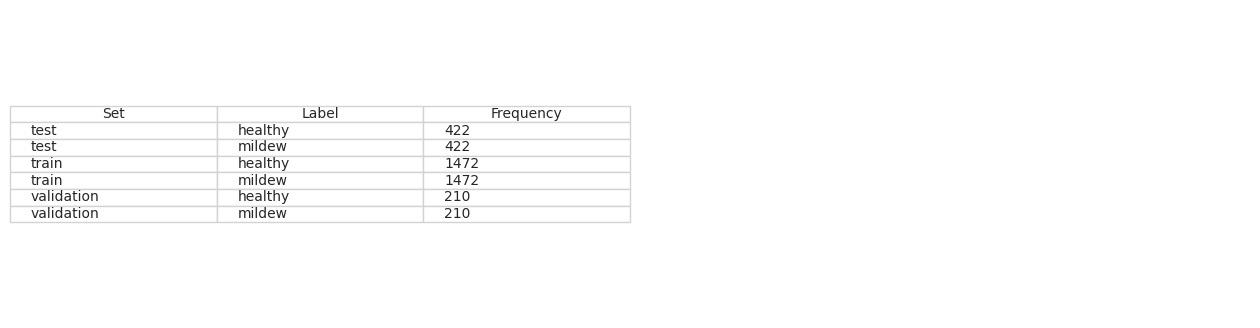

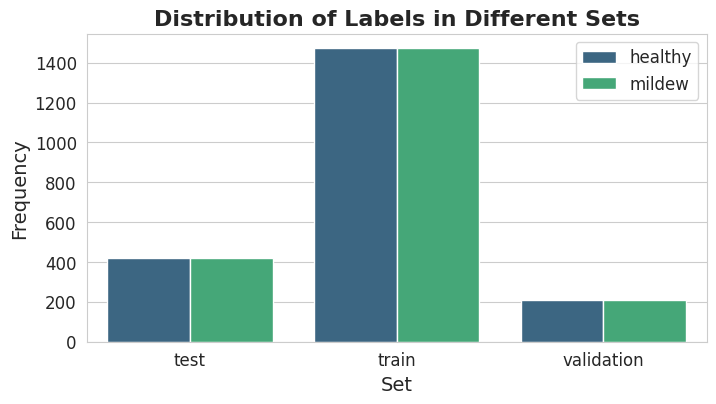

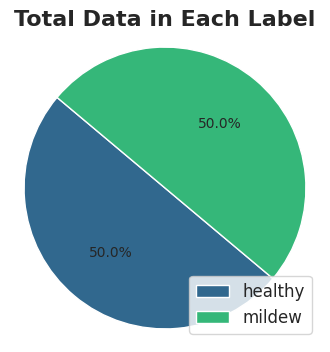

In [153]:
display_data_distribution(dataset_dir, file_path)


---

## Image Augmentation

### Setup Augmentation

**Import Libraries**

In [154]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Augmentation Pipeline**

In [155]:
augmentation_data = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.1,
    rotation_range=10,
    shear_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.9, 1.1],
    fill_mode='nearest',
    rescale=1.0/255.0,
)

**Batch Size**

In [156]:
batch_size = 20

**Augmentation Train image Set**

In [157]:
train_set = augmentation_data.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
    )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'mildew': 1}

**Augmentation Validation image Set**

In [158]:
validation_set = augmentation_data.flow_from_directory(
    val_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
    )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'mildew': 1}

**Augmentation Test image Set**

In [159]:
test_set = augmentation_data.flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'mildew': 1}

### Plot Augmented Images

In [160]:
label_names = {i: label for i, label in enumerate(labels)}
print('Label names:', label_names)


Label names: {0: 'healthy', 1: 'mildew'}


**Augmented Train Image Set**

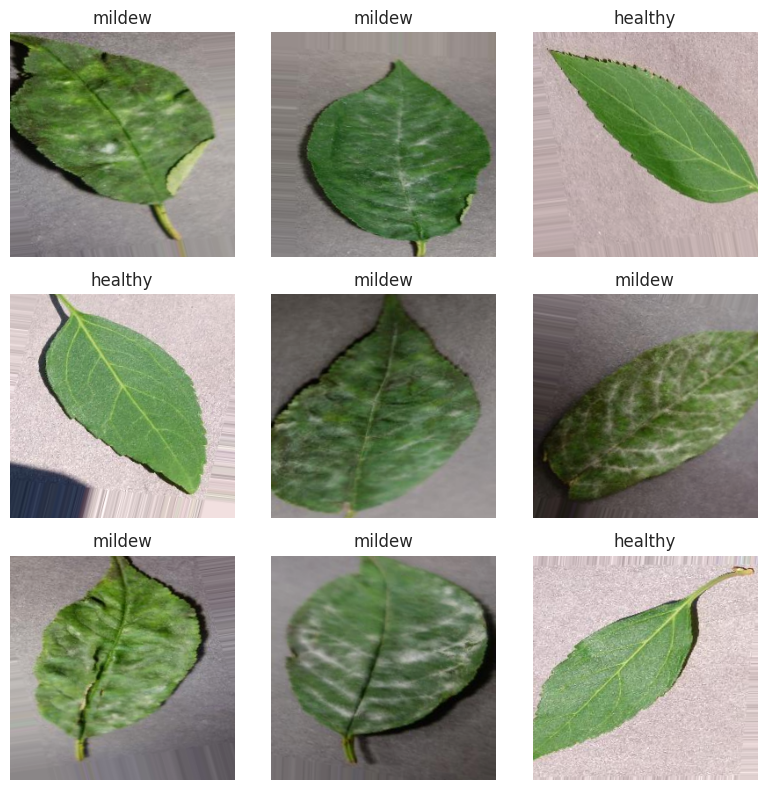

In [161]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i in range(9):
    img, label = next(train_set)
    label_name = label_names[label[0]]
    
    axes[i // 3, i % 3].imshow(img[0])
    axes[i // 3, i % 3].set_title(label_name)
    
    axes[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()

**Augmented Validation Image Set**

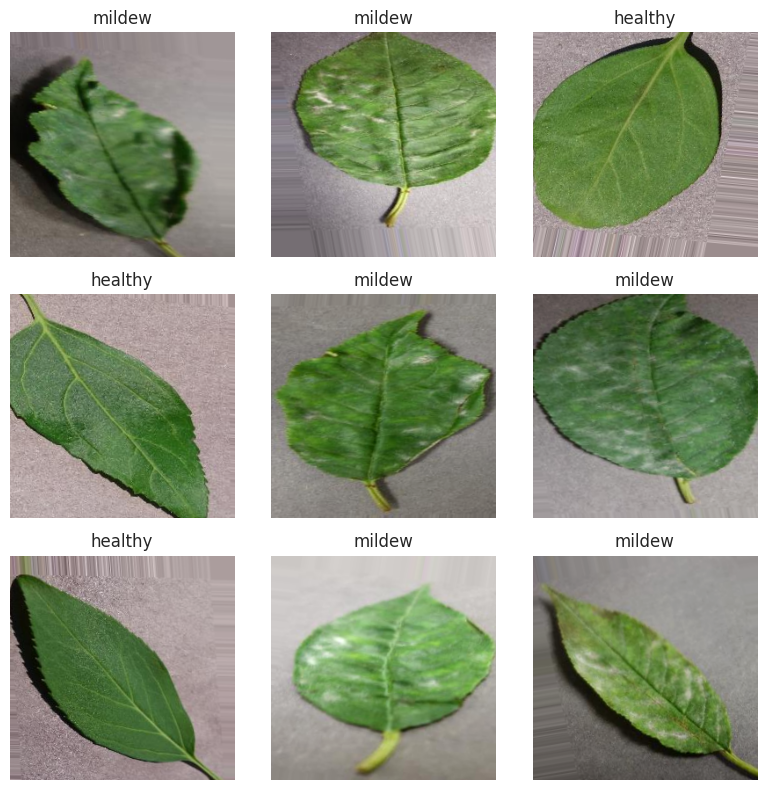

In [162]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i in range(9):
    img, label = next(validation_set)
    label_name = label_names[label[0]]
    
    axes[i // 3, i % 3].imshow(img[0])
    axes[i // 3, i % 3].set_title(label_name)
    
    axes[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()

**Augmented Test Image Set**

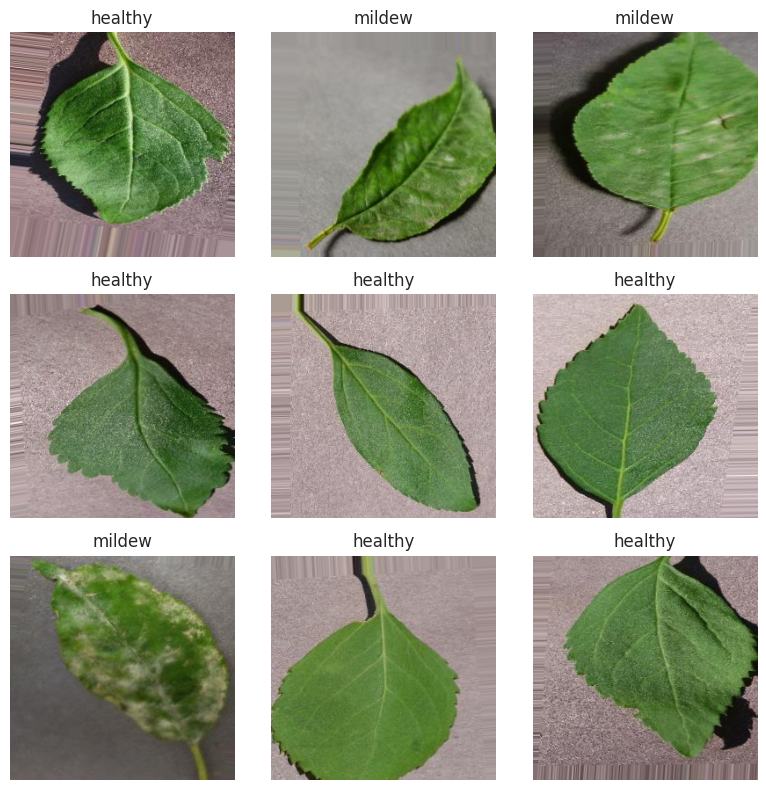

In [163]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i in range(9):
    img, label = next(test_set)
    label_name = label_names[label[0]]
    
    axes[i // 3, i % 3].imshow(img[0])
    axes[i // 3, i % 3].set_title(label_name)
    
    axes[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()

**Save class_indicies**

In [164]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

## Building the Model

**Import Model Packages**

In [165]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout

### Model

In [166]:
def build_model(hyper):
    """
Description:
    Builds a convolutional neural network (CNN) model with hyperparameters for hyperparameter tuning

Parameters:
    hyper - HyperParameters:   A HyperParameters object containing the hyperparameters to tune the model
    image_shape - tuple:    The shape of input images (height, width, channels)

Returns:
    model - Sequential:     A TensorFlow Keras Sequential model configured with the specified hyperparameters
"""
    
    model = Sequential()

    model.add(Conv2D(filters=32,
                     kernel_size=(3, 3),
                     input_shape=image_shape,
                     activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64,
                     kernel_size=(3, 3),
                     activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=128,
                     kernel_size=(3, 3),
                     activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    hp_units = hyper.Int('units', min_value=64, max_value=512, step=64)

    model.add(Dense(hp_units, activation='relu'))

    model.add(Dropout(0.2))

    model.add(Dense(1, activation='sigmoid'))

    hyper_learning_rate = hyper.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
    opt = keras.optimizers.Adam(learning_rate=hyper_learning_rate)

    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    return model

In [167]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

### Hyperband Tuner

**Import Hyperparameter Tuning Packages**

In [168]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [169]:
from tensorflow import keras
from keras_tuner import Hyperband

**Defining Hyperband Tuner Configuration**

In [170]:
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='mildew_detection'
)

/workspace/.pip-modules/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Model Training

**Hyperparameter Tuning**

In [171]:
tuner.search(train_set,
             validation_data=validation_set,
             epochs=25,
             steps_per_epoch=len(train_set) // batch_size,
             callbacks=[early_stop],
             verbose=2
             )

best_hypers = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The hyperparameter search is complete. The optimal number of units "
      f"in the first densely-connected layer is {best_hypers.get('units')} and "
      f"the optimal learning rate for the optimizer is "
      f"{best_hypers.get('learning_rate')}.")

Trial 30 Complete [00h 01m 51s]
val_accuracy: 0.9261904954910278

Best val_accuracy So Far: 0.9857142567634583
Total elapsed time: 00h 22m 55s
The hyperparameter search is complete. The optimal number of units in the first densely-connected layer is 256 and the optimal learning rate for the optimizer is 0.001.


In [172]:
model = tuner.hypermodel.build(best_hypers)

**Model Summary**

In [173]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,584,961 (112.86 MB)

 Trainable params: 29,584,961 (112.86 MB)

 Non-trainable params: 0 (0.00 B)